# 自我介绍

- 姓名：齐伟
- 其他称呼：齐老师，老齐
- 个人网站：www.itdiffer.com
- 出版书籍：
    - 《跟老齐学Python：轻松入门》
    - 《跟老齐学Python：Django实战》
    - 《跟老齐学Python：数据分析》
    - 《Python大学使用教程》
    
# 数据科学准备

- 编辑器：jupyter
- 应知应会：
    - Python
    - Pandas, Numpy
    - git 
    - github.com, stackoverflow.com, google.com

- 其他工具：
    - Matplotlib, Seaborn, ...    [案例上手 Python 数据可视化](https://gitbook.cn/gitchat/column/5c6cd09e7fa9074fde9c8909)
    - SciPy, scikit learn, ...
    - TensorFlow, pyTorch, ...

# 数据科学项目的工作流程

![image.png](./images/workflow.png)

**本课程的所用到的本地数据，可以在下列仓库获得：**

https://github.com/qiwsir/DataSet

# 课程介绍

![lessons](./images/lessons.png)

# 数据可视化

推荐参考资料：

- gitchat课程：[《案例上手 Python 数据可视化》](https://gitbook.cn/gitchat/column/5c6cd09e7fa9074fde9c8909/topic/5c6cd16f7fa9074fde9c8911)，介绍了6个可视化工具，20个数据分析案例
- 《跟老齐学Python：数据分析》

## 数据可视化的类别

通常有两种可视化数据的方式——这是我提出的分类，如有雷同，纯属巧合：

- 艺术性可视化
- 数学性可视化

![art-visual](./images/cn-usa.jpg)

## matplotlib

官方网站：https://matplotlib.org/
    
安装：pip3 install matplotlib

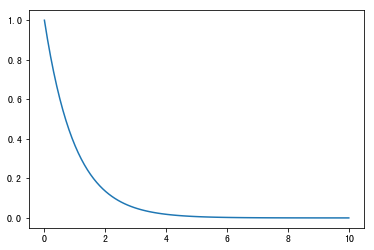

In [45]:
%matplotlib inline    

# 将图示插入到当前浏览器，注意：必须单独一行，并且写在最前面。

# 简单的绘图操作
# 以下思路继承了matlab的代码风格

import numpy as np
import matplotlib.pyplot as plt    # 引入绘图模块

a = np.linspace(0, 10, 100)    # 得到等差数列
b = np.exp(-a)
plt.plot(a,  b)    # 分别用a, b表示横纵坐标

In [43]:
import numpy as np

In [46]:
plt.plot?

**要善于使用帮助文档**

np.linspace?

如果是程序文件（.py）实现上面的代码，如下：

```
#coding: utf-8
'''
filename: ./chapter111.py
'''

import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(0, 10, 100)
b = np.exp(-a)
plt.plot(a,  b)

plt.show()    # 每个文件中只有一句，在jupyter不需要写。
```

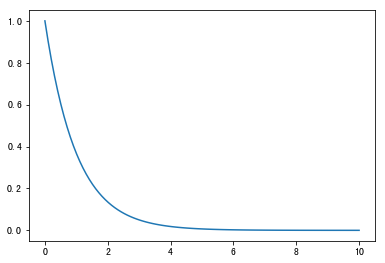

In [5]:
# 面向对象风格

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
a = np.linspace(0, 10, 100)
b = np.exp(-a)
ax.plot(a, b)

Text(30, 0.6, '$e^{-\\frac{x}{2}}sin(2\\pi{x}), x=1.25$')

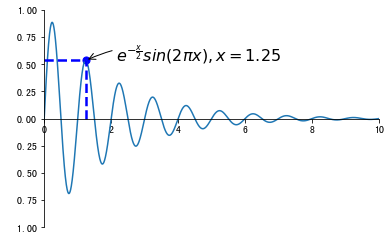

In [8]:
# 案例1：标注曲线上的点
x = np.arange(0, 10, 0.005)
y = np.exp(-x/2) * np.sin(2*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y)

# 分别设置x, y坐标轴的标识范围
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

# ax.spines是数据显示区的边线，返回OrderedDict类型。
ax.spines['right'].set_color('none')    # 右边线的颜色设置为none，
                                        # 即无色，不显示
ax.spines['top'].set_color('none')      
ax.xaxis.set_ticks_position('bottom')    # X轴刻线显示位置
ax.spines['bottom'].set_position(('data',0))  # 将底部边线设置到
                                              # 数值为0的位置  
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position('zero')    # 'zero' -> ('data', 0.0)

#以下标注
x1 = 1.25
y1 = np.exp(-x1/2) * np.sin(2*np.pi*x1)
ax.scatter([x1,], [y1,], 50, color='blue')    # 绘制一个点

# 从点出发，向坐标轴引出垂线
ax.plot([x1, x1], [0, y1], color='blue', linewidth=2.5, linestyle="--")    #②
ax.plot([0, x1], [y1, y1], color='blue', linewidth=2.5, linestyle='--')    #③

# 标注文字说明
ax.annotate(r'$e^{-\frac{x}{2}}sin(2\pi{x}), x=1.25$',     
             xy=(x1, y1), xycoords='data',  
             xytext=(+30, +0.6), textcoords='offset points', 
            fontsize=16,
             arrowprops=dict(arrowstyle="->", 
                             connectionstyle="arc3,rad=.2"))    #④



ax.annotate说明：

- `r'$e^{-\frac{x}{2}}sin(2\pi{x}), x=1.25$', `，这是所显示的内容，在 Matplolib 中，支持 LaTex 编辑显示公式。注意使用原始字符串
- xy=(x1, y1)：说明被标注点的坐标。
- xycoords='data'：标注内容指向的点，默认值是 'data'，也可以选其他值（参考官方文档）。
- xytext=(+30, +0.6)：上述文本内容的显示位置。
- arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")：箭头的设置。

In [47]:
# 案例2： 绘制散点图
# 函数：plt.scatter
import pandas as pd
cities = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/jiangsu/city_population.csv")
cities

,name,area,population,longd,latd
0,南京市,6582.31,8004680,118.78,32.04
1,无锡市,4787.61,6372624,120.29,31.59
2,徐州市,11764.88,8580500,117.20,34.26
3,常州市,4384.57,4591972,119.95,31.79
4,苏州市,8488.42,10465994,120.62,31.32
5,南通市,8001.00,7282835,120.86,32.01
6,连云港市,7615.29,4393914,119.16,34.59
7,淮安市,9949.97,4799889,119.15,33.50
8,盐城市,16972.42,7260240,120.13,33.38
9,扬州市,6591.21,4459760,119.42,32.39


In [ ]:
pd.rea

Text(0.5, 1.0, '江苏省各城市面积和人口')

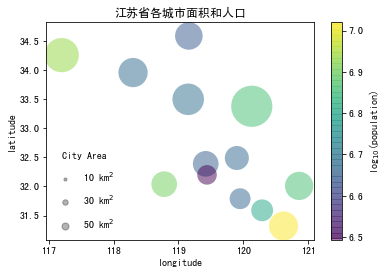

In [10]:
lat = cities['latd']
lon = cities['longd']
population = cities['population'],
area = cities['area']

plt.scatter(lon, lat, label=None, 
            c=np.log10(population)[0], cmap="viridis", 
            s=area/10, linewidths=0, alpha=0.5)    # 绘制散点图
plt.axis(aspect='equal')
plt.xlabel("longitude")    # 注明坐标轴名称
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')  # 绘制数据光谱  

# 点的面积对应三个面积
for area in [10, 30, 50]:  
    plt.scatter([], [], c='k', alpha=0.3, 
                s=area, label=str(area) + ' km$^2$')

# 设置图例的位置
plt.legend(scatterpoints=1, frameon=False, 
           labelspacing=1, title='City Area')
plt.title('江苏省各城市面积和人口')    # 设置图像的名称

在上述图示中，汉语的显示是一个难点，通过网络搜索，解决汉语显示问题。最好一劳永逸地解决。

In [48]:
# 案例3：柱形图，plt.bar
box_office = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/boxoffice/box1018.csv",
                         index_col=0)
box_office    # 显示每年8月份的票房前十名和其余影片票房收入

,2010-8,2011-8,2012-8,2013-8,2014-8,2015-8,2016-8,2017-8,2018-8
1,26918,39162,27993,63665,39313,73427,98811,424006,132009
2,17760,30890,23051,29567,36338,54977,58144,53419,122078
3,8816,22919,15020,29460,28981,48912,38770,49087,102581
4,8125,17219,14636,17121,20807,20948,38675,34147,68285
5,5157,6243,13518,16468,18746,19542,34589,29012,55460
6,5133,5326,8895,14473,18714,18083,26931,23652,32013
7,3980,3594,7037,11416,16926,17220,16663,16825,23011
8,2655,3410,6868,7542,9770,14643,15334,15806,19543
9,2581,3301,4159,6286,9729,14458,14736,12588,17830
10,2233,1954,3471,5440,9464,9977,8376,11341,15238


In [49]:
box_office.dtypes

2010-8    int64
2011-8    int64
2012-8    int64
2013-8    int64
2014-8    int64
2015-8    int64
2016-8    int64
2017-8    int64
2018-8    int64
dtype: object

In [50]:
# 统计每年8月份票房总收入
total = box_office.sum()
total

2010-8     91603
2011-8    147155
2012-8    141864
2013-8    226112
2014-8    262214
2015-8    361763
2016-8    405605
2017-8    736595
2018-8    682038
dtype: int64

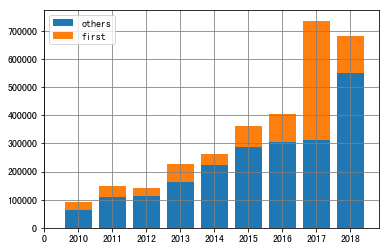

In [21]:
# 绘制柱形图，分别显示历年的票房第一和其他的收入（堆叠柱形图），
# 两者相加就是票房总计
import matplotlib.ticker as ticker

first = box_office.iloc[0].astype(np.int)    # 历年票房第一
after_first = total - first    # 其他影片票房收入

date_index = pd.to_datetime(total.index)   # 将total的索引取出，
                                           # 并转化为pandas的时刻
fig, ax = plt.subplots()
ax.grid(color='gray')    # 设置坐标网格

# 绘制柱形图
ax.bar(range(1, 10), after_first.values, label='others')    
ax.bar(range(1, 10), first.values, 
       bottom=after_first.values,   # 设置每个柱子相对底部的距离
       label='first')    

ax.set_xticks(range(0, 10))   # 设置x轴主刻线的范围
# 设置主刻线对应的标示
# 使用了 matplotlib.ticker 中的 IndexFormatter 类得到标示对象
ax.xaxis.set_major_formatter(
    ticker.IndexFormatter([0]+date_index.year.tolist()))

plt.legend(loc=0)    # 图例位置

箱线图式样
![boxplot](./images/boxplot.png)

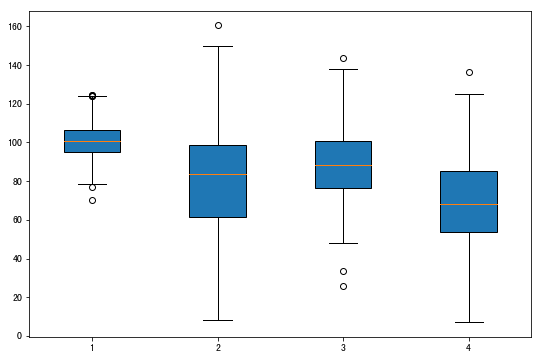

In [22]:
# 案例4：箱线图 plt.boxplot

# 生成随机数
np.random.seed(10)    # 随机种子，使得每次操作结果一样
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)   
data = [collectn_1, collectn_2, collectn_3, collectn_4]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist=True)
#参数 patch_artist=True，它控制的是矩形框是否填充

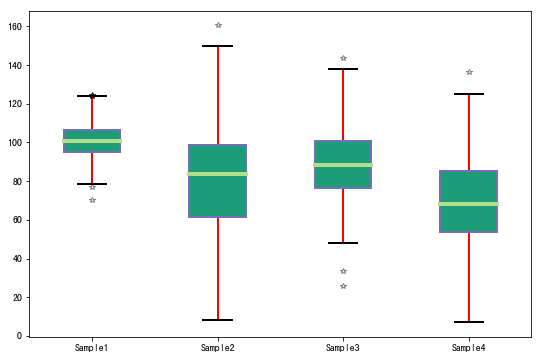

In [23]:
# 理解bp代表的箱线图对象
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist=True)
# 修改矩形框内的填充色和矩形框的边线
for box in bp['boxes']:
    box.set( color='#7570b3', linewidth=2)    # 矩形框边线颜色和粗细
    box.set( facecolor = '#1b9e77' )    # 填充色

# 须线的粗细和颜色
for whisker in bp['whiskers']:
    whisker.set(color='red', linewidth=2)

# 表示上下限的线的颜色和粗细
for cap in bp['caps']:
    cap.set(color='black', linewidth=2)

# 表示中位数的的线的颜色和粗细
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=4)

# 表示离群值的符号设置
for flier in bp['fliers']:
    flier.set(marker='*', color='#e7298a', alpha=0.5)

# 设置坐标轴
ax.set_xticklabels(['Sample1', 'Sample2', 'Sample3', 'Sample4'])
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

In [24]:
bp

{'whiskers': [<matplotlib.lines.Line2D at 0x120dd1048>,
 'caps': [<matplotlib.lines.Line2D at 0x120dd1748>,
 'boxes': [<matplotlib.patches.PathPatch at 0x120dcbda0>,
 'medians': [<matplotlib.lines.Line2D at 0x120dd1dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x120dd1eb8>,
 'means': []}

变量 bp 引用的对象是字典对象，其中包含（以下各项其实都是对象）：

- boxes，箱线图的矩形框
- whiskers，箱线图的须线，即从矩形框开始向两侧延伸的线段
- medians，表示中位数的线段
- caps，表示上、下限的线段
- fliers，表示离群值的符号
- means，表示平均值的符号

In [51]:
#案例5：饼图和综合练习
# 数据来源于京东对某商品的评价，利用爬虫技术获取数据
# 得到的数据之后，经过适当处理，并保存
df = pd.read_csv("/Users/qiwsir/Documents/Codes/Dataset/bra/colors.csv")
colors = pd.DataFrame({'productColor':df.values[0:,1], 'color':df.values[0:,2]})
colors.head()

,productColor,color
0,22咖啡色,棕色
1,02粉色,粉色
2,071蓝色,蓝色
3,071黑色,黑色
4,071肤色,肤色


In [52]:
df2 = pd.read_csv("/Users/qiwsir/Documents/Codes/Dataset/bra/bra.csv")
cbras = pd.merge(df2, colors, on="productColor", how="left")
cbras.head()

,creationTime,productColor,productSize,color
0,2016-06-08 17:17:00,22咖啡色,75C,棕色
1,2017-04-07 19:34:25,22咖啡色,80B,棕色
2,2016-06-18 19:44:56,02粉色,80C,粉色
3,2017-08-03 20:39:18,22咖啡色,80B,棕色
4,2016-07-06 14:02:08,22咖啡色,75B,棕色


<BarContainer object of 10 artists>

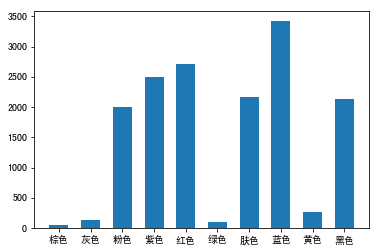

In [27]:
# 绘制柱形图，研究一下什么颜色的购买量最高
color_count = cbras.groupby('color').count()
# pandas 中的分组统计——按照“color”特征的值（颜色）统计每种颜色的记录数量

datas = color_count['productColor']
labels = datas.index
position = range(len(datas.index))

plt.bar(x=position, height=datas.values, width=0.6, tick_label=labels)

[None]

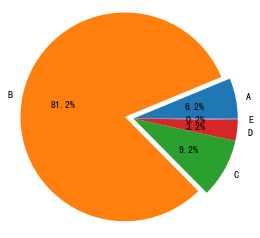

In [28]:
# 特征“productSize”中的数据不利于统计，需要对其进行再处理，即所谓的“数进行清洗”。

# 对 df2 中的 productSize 特征的数值进行清洗
bras2 = df2['productSize'].str.upper()
cup = bras2.str.findall("[a-zA-Z]+").str[0]    #用正则表达式进行初步清洗
cup2 = cup.str.replace('M', 'B')    #将其他型号归类为A-E
cup3 = cup2.str.replace('L', 'C')
cup4 = cup3.str.replace('XC', 'D')
cup5 = cup4.str.replace('AB', 'B')
df2['cup'] = cup5

# 数据清洗完毕，进行分组统计，并用饼图表现结果
cup_count = df2.groupby('cup').count()
labels = ['A', 'B', 'C', 'D', 'E']
fig, ax = plt.subplots()
explode = (0, 0.1, 0, 0, 0)
#绘制饼图
ax.pie(cup_count['productColor'], explode=explode, labels=labels, autopct='%1.1f%%', radius=1.2, startangle=0)
ax.set(aspect='equal')

# seaborn

seaborn是基于matplotlib的绘图库，比matplotlib有更多优化。

官网：https://seaborn.pydata.org/

安装：pip3 install seaborn

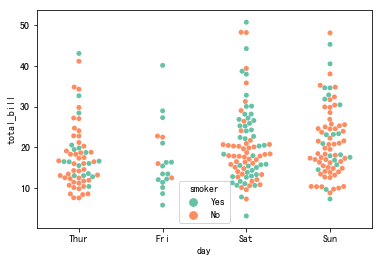

In [53]:
# 案例1：分类特征散点图
%matplotlib inline
import seaborn as sns    # 引入

tips = sns.load_dataset("tips")    # 载入集成数据
sns.swarmplot(x="day", y="total_bill", hue="smoker", 
              data=tips, palette="Set2")

In [54]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


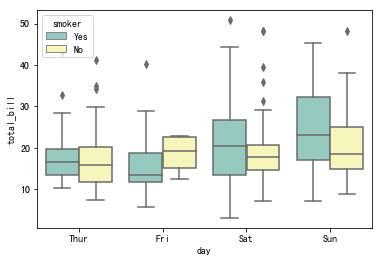

In [30]:
# 案例2：分类特征分布图
sns.boxplot(x="day", y="total_bill", hue="smoker",
            data=tips, palette="Set3")
# 下面的与上面的等效
# sns.catplot(x="day", y="total_bill", hue="smoker", data=tips, kind='box', palette="Set3")

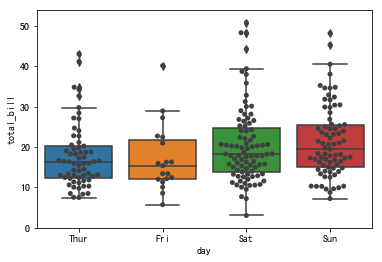

In [31]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)
ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


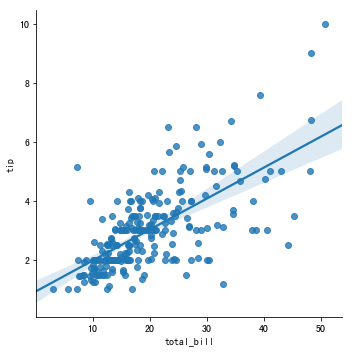

In [32]:
# 案例3：回归统计图
sns.lmplot(x='total_bill', y='tip', data=tips)

In [33]:
# 案例4：综合案例，分析马拉松数据
import pandas as pd
marathon = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/marathon/marathon.csv")
marathon.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [34]:
marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37250 entries, 0 to 37249
Data columns (total 4 columns):
age       37250 non-null int64
gender    37250 non-null object
split     37250 non-null object
final     37250 non-null object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


没有缺失数据。但是，split 和 final 两个特征中的数据，不是数字类型。“01:05:38” 这是用字符串的形式表示了所用时间长度（一小时五分钟三十八秒），对于这种数据类型的特征，需要进行转化，首先转换为时间类型

In [35]:
import datetime
def convert_time(s):
    h,m,s = map(int, s.split(":"))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)
marathon = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/marathon/marathon.csv", 
                       converters={"split":convert_time, 
                                   "final":convert_time})

marathon.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

还要继续转化，将时间间隔的表述转化为整数，比如以秒为单位的整数。时间间隔转化为整数

In [36]:
marathon['split_sec'] = marathon['split'].astype(int) * 1e-9
marathon['final_sec'] = marathon['final'].astype(int) * 1e-9
marathon.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


In [37]:
# 描述统计
marathon.describe()

,age,split,final,split_sec,final_sec
count,37250.000000,37250,37250,37250.000000,37250.000000
mean,40.697369,0 days 02:03:54.425664,0 days 04:48:09.303597,7434.425664,17289.303597
std,10.220043,0 days 00:22:55.093889,0 days 01:03:32.145345,1375.093890,3812.145345
min,17.000000,0 days 01:05:21,0 days 02:08:51,3921.000000,7731.000000
25%,33.000000,0 days 01:48:25,0 days 04:02:24,6505.000000,14544.000000
50%,40.000000,0 days 02:01:13,0 days 04:44:25,7273.000000,17065.000000
75%,48.000000,0 days 02:16:11,0 days 05:27:36,8171.000000,19656.000000
max,86.000000,0 days 04:59:49,0 days 10:01:08,17989.000000,36068.000000


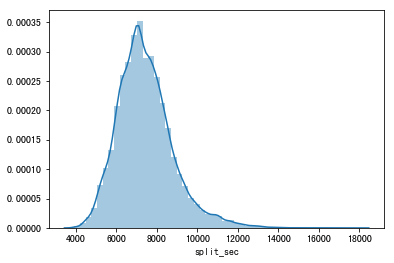

In [38]:
# 数据分布
#直方图
sns.distplot(marathon['split_sec'])

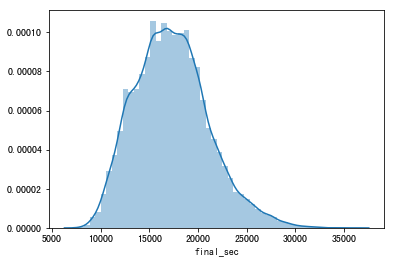

In [39]:
sns.distplot(marathon['final_sec'])


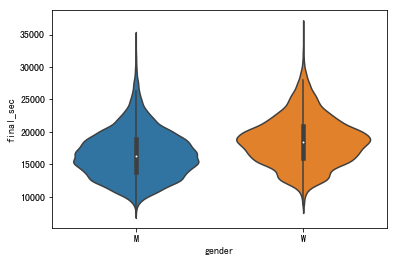

In [40]:
sns.violinplot(x='gender', y='final_sec', data=marathon)

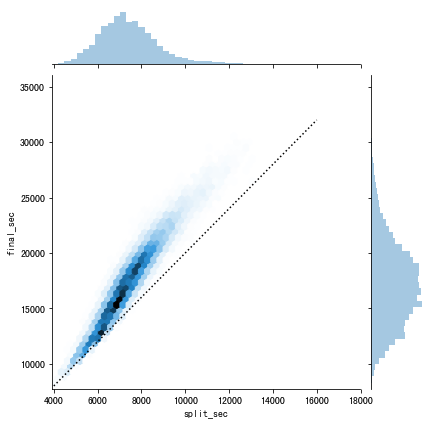

In [41]:
# 分析半程和全程时间关系
g = sns.jointplot("split_sec", "final_sec", 
                  data=marathon, kind='hex')   #or: kind='scatter'

#绘制一条直线，作为参考
import numpy as np
g.ax_joint.plot(np.linspace(4000, 16000), 
                np.linspace(8000, 32000), ":k")   

In [42]:
# 半程比
marathon['split_frac'] = 1 - 2 * marathon['split_sec'] / marathon["final_sec"]
marathon.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


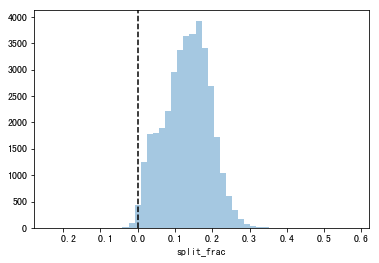

In [43]:
import matplotlib.pyplot as plt
sns.distplot(marathon['split_frac'], kde=False)
plt.axvline(0, color='k', linestyle="--")   
# 垂直于 x 轴的直线，0 表示 x 轴位置

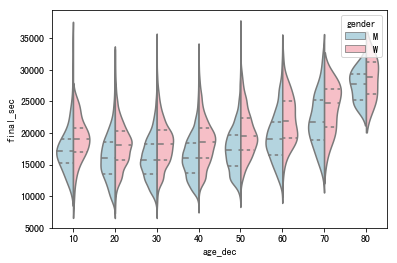

In [45]:
# 不同年龄段全程用时
marathon['age_dec'] = marathon['age'].map(lambda age: 10 * (age // 10))
sns.violinplot(x="age_dec", y="final_sec", hue="gender", data=marathon, 
               split=True, inner='quartile', 
               palette=['lightblue', 'lightpink'])

# 特征工程

- 数据清理：类型转化、重复数据、缺失值、离群值
- 特征变换：数值化、二值化、OneHot编码、特征离散化、数据规范化（标准化、区间化、归一化）
- 特征选择
- 特征抽取
- 数据集划分

## 特征选择

![feature select](./images/feature-select.png)

### 封装器法

![wrapper](./images/wrapper.png)

举例：循序向前特征选择（Sequential Forward Selection, SFS）

![sfs](./images/sfs.png)

mlxtend的第三方库提供了实现包括SFS的多种序列特征选择方法（官方网站：http://rasbt.github.io/mlxtend/）

In [55]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.data import wine_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = wine_data()
X.shape

(178, 13)

In [56]:
#SFS举例
#划分数据集
X_train, X_test, y_train, y_test= train_test_split(X, y, 
                                                   stratify=y,
                                                   test_size=0.3,
                                                   random_state=1)
#数据规范化：标准化
std = StandardScaler()
X_train_std = std.fit_transform(X_train)

#k-最近邻分类模型，作为目标函数
knn = KNeighborsClassifier(n_neighbors=3)   
sfs = SFS(estimator=knn,     # 创建SFS模型
           k_features=4,
           forward=True,     # 指明是向前选择，如果为False，则向后选择
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)
sfs.fit(X_train_std, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2019-05-19 11:36:40] Features: 1/4 -- score: 0.8629032258064516[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2019-05-19 11:36:40] Features: 2/4 -- score: 0.9596774193548387[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2019-05-19 11:36:40] Features: 3/4 -- score: 0.9919354838709677[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

SequentialFeatureSelector(clone_estimator=True, cv=0,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'),
             floating=False, forward=True, k_features=4, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring='accuracy', verbose=2)

再仔细查看In[2]执行过程中输出的日志信息（以时间为标识说明）。

- 时间1，从13个特征中选择了一个最佳的特征，并将其加入到空集合，同时从原来的13个特征集合中删除此特征。根据scoring参数所设定的评估方法，此特征对于模型knn得分为0.86（score: 0.8629032258064516）。
- 时间2.从12个特征中选一个，与上一步所选择的特征组合之后，模型knn的得分最高者胜出（score: 0.9596774193548387）。
- 时间3，从11个特征选择一个，依照前述原则评估模型（score: 0.9919354838709677）
- 时间4，从10个特征选择一个，依照前述原则评估模型（score: 0.9838709677419355）。因为参数k_features=4规定了最多选出4个特征，于是到此结束选择。


In [49]:
sfs.subsets_
# 选择3个特征的时候，准确率最好

{1: {'feature_idx': (6,),
  'cv_scores': array([0.86290323]),
  'avg_score': 0.8629032258064516,
  'feature_names': ('6',)},
 2: {'feature_idx': (6, 9),
  'cv_scores': array([0.95967742]),
  'avg_score': 0.9596774193548387,
  'feature_names': ('6', '9')},
 3: {'feature_idx': (6, 9, 11),
  'cv_scores': array([0.99193548]),
  'avg_score': 0.9919354838709677,
  'feature_names': ('6', '9', '11')},
 4: {'feature_idx': (6, 8, 9, 11),
  'cv_scores': array([0.98387097]),
  'avg_score': 0.9838709677419355,
  'feature_names': ('6', '8', '9', '11')}}

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


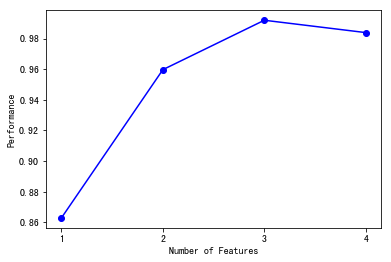

In [57]:
%matplotlib inline
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')    

### 过滤器法

![filter](./images/filter.png)

实现路径：

![filter-path](./images/filter-path.png)


In [51]:
# 过滤器法举例
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest    #sk-learn提供的过滤器
from sklearn.feature_selection import chi2

iris = load_iris()
X, y = iris.data, iris.target
skb = SelectKBest(chi2, k=2)    # 过滤器实例，k表示特征子集中的特征数量
result = skb.fit(X, y)    # 得到χ2值和P值，有监督的特征选择
print("X^2 is: ", result.scores_)
print("P-values is: ", result.pvalues_)

X^2 is:  [ 10.81782088   3.7107283  116.31261309  67.0483602 ]
P-values is:  [4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]


In [52]:
#根据从大到小的排序取k个特征——取前两个。

X_new = skb.transform(X)
X_new.shape


(150, 2)

In [53]:
# 所选择的两个特征名称
import numpy as np
[iris.feature_names[np.where(X[0, :]==i)[0][0]] for i in X_new[0, :]]

['petal length (cm)', 'petal width (cm)']

### 嵌入法

将特征选择过程与模型训练融为一体，在模型训练过程中自动进行了特征选择，被称为特征选择的“嵌入法” （Embedded）

In [57]:
import pandas as pd
df_wine = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/winemag/wine_data.csv")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:, 1:], df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

#创建Logistic（对数几率回归）模型，使用L1惩罚
lr = LogisticRegression(C=1.0, penalty='l1') 

#创建特征选择实例
model = SelectFromModel(lr, threshold='median')

X_new = model.fit_transform(X_train_std, y_train)
X_new.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_p

(124, 7)

## 特征抽取

### 无监督特征抽取

![unsurex](./images/unsurex.png)

In [58]:
# 举例：主成分分析，Principal Component Analysis，简称PCA
# 降维
# 手写识别

from scipy.io import loadmat
mnist = loadmat("/Users/qiwsir/Documents/Codes/DataSet/mnist/mnist-original.mat")
mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [59]:
#分别得到样本数据及其标签。
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]
mnist_data.shape

(70000, 784)

In [60]:
from sklearn.decomposition import PCA
pca = PCA(.95)    # ⑤
lower_dimensional_data = pca.fit_transform(mnist_data)
pca.n_components_
#⑤将参数n_components的值设置为0.95，即按照特征的可解释方差比例保留维度，
#最终用模型的属性n_components_返回了经过PCA之后所得数据集特征个数

154

- n_components为整数，比如n_components=2，表示此PCA模型要保留2个特征。
- n_components='mle'，mle即为maximum likelihood estimation，翻译为“最大似然估计”，意思是PCA实例会根据“最大似然估计”决定保留的维度数量。注意此时另外一个参数svd_solver的值应该为'full'（如果不显式设置，解析器也会自动如此解析）。
- n_components还可以是0到1的浮点数，表示特征的可解释方差比例超过此数据值的被保留。

Text(0.5, 1.0, '95% of Explained Variance')

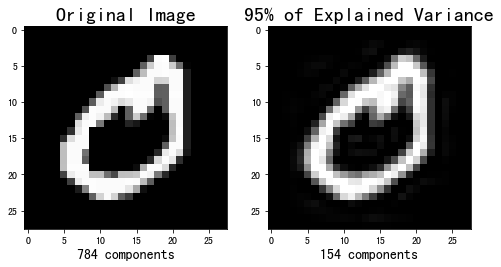

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

iverse_data = pca.inverse_transform(lower_dimensional_data)

plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(mnist_data[1].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(iverse_data[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20)

### 有监督特征抽取

![surex](./images/surex.png)

In [62]:
# “线性判别分析”（LDA）

# PCA失效
# 创造一批模拟数据
from sklearn.datasets.samples_generator import make_classification
X,y = make_classification(n_samples=1000,
                          n_features=4,
                          n_redundant=0,
                          n_classes=3,
                          n_clusters_per_class=1,
                          class_sep=0.5,
                          random_state=10)
X.shape, y.shape

((1000, 4), (1000,))

- n_samples=1000，创建1000个样本的数据集。
- n_features=4，数据集4个特征。
- n_classes=3，这些数据被分为3个类别，即标签是分类型的。
- n_clusters_per_class=1，每个类别有一个分布中心。


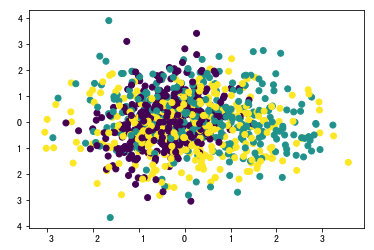

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

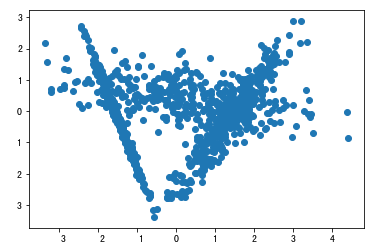

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)
plt.scatter(X_lda[:, 0], X_lda[:, 1])

# 分类算法

1. 朴素贝叶斯
2. 决策树
3. 支持向量机（SVM）
4. k-最近邻
5. 对数几率回归（Logistic）

工具：scikit-learn

### 朴素贝叶斯方法

基本假设：分类的特征是条件独立的。

1. 高斯模型

适用于连续特征

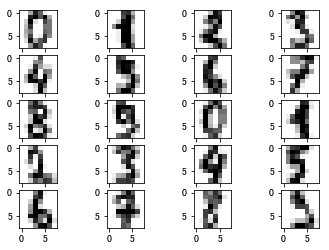

In [65]:
%matplotlib inline
# 案例：手写识别

#显示手写图片
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

fig = plt.figure()
for i in range(20):
    ax = fig.add_subplot(5, 4, i+1)
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r, 
              interpolation='nearest')

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target,
                                                   test_size=0.25,
                                                   random_state=0)
cls = GaussianNB()    # 没有参数，不用调参
cls.fit(X_train, y_train)

print("Training Score: {:.2f}".format(cls.score(X_train, y_train)))
print("Testing Score: {:.2f}".format(cls.score(X_test, y_test)))

Training Score: 0.86
Testing Score: 0.83


2. 多项式模型

适用于离散特征

In [68]:
# 案例：NLP，
# 以下所用数据：fetch_20newsgroups，收集了超过来自20个不同的来源的近20000篇文章

from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

上面获取数据的过程，有时候受到网络影响

In [69]:
# 全部文章数量
len(twenty_train.data) + len(twenty_test.data)

18846

In [70]:
# 全部文章划分为20个标题（即分类标签）
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [71]:
# 查看第一篇文章内容
print("\n".join(twenty_train.data[0].split("\n")))

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [72]:
# 与文章对应的分类标签的值，是用twenty_train.target_names的索引。
# 例如上面文章类别属于 'rec.autos',索引为7
twenty_train.target[0]

7

In [73]:
# 可以用下面的方式查看到对应标签的名称

# 建立索引与名称的字典（对应）
codings = list(range(len(twenty_train.target_names)))
target_dic = dict(zip(codings,twenty_train.target_names))

target_dic[twenty_train.target[0]]

'rec.autos'

**词袋（bag of words）**

例如下面两篇文章：

- D1: Hi, I am Mike and I like Boston.
- D2: Boston is a city and people in Boston like the Red Sox.

将所有单词取出（不重复），不考虑顺序，组成如下结构：

```
bag = ['Hi', 'I', 'am', 'Mike', 'and', 'like', 'Boston', 'is', 'a', 'city, 'and', 'people', 'in', 'the', 'red', 'sox]
```

然后记录D1中单词相对bag而言出现的次数。结果如下：

```
[1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0 ,0, 0, 0, 0, 0]
```

如此就组成了一个向量。同样的方式D2也能组成如下向量。

```
[0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]
```

除了计数之外，还可以记录频数。
如果将每篇文章的词频向量组合起来，就形成了一个矩阵，称为“文章矩阵”，或者“词频统计”（term-frequency，tf）。通常表示为：tf(d, t) = f_t,d，是稀疏矩阵

![tf](./images/tf.png)

d∈D,D是整个语料库，d是语料库中的一篇文章，t是文章中单词的频数。

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_tf = count_vect.fit_transform(twenty_train.data)

print("Shape of term-frequency matrix:", X_train_tf.shape)

Shape of term-frequency matrix: (11314, 130107)


In [83]:
# 上述得到的词频统计矩阵，是稀疏矩阵。每一行对应着twenty_train中的一篇文章。
# 每一列，是对该文章中是否有该单词（词频）数值
print("Number of training documents: ", len(twenty_train.data))

Number of training documents:  11314


词频，并不能表示该单词对文章的贡献，比如“the""a"等频率相对较高。

TF是term frequency，词频。
IDF是inverse document frequency，逆向文件频率。
通常要考查tf-idf的联合比率，即将上述两个值相乘。
用以表示某个词在该文章中的重要程度。

例如：在一篇100字的文章中，“书”出现了5此，那么“书”的词频：

tf = (某个词的出现次数)/(该文章的总词数) = 5/100 = 0.05

假设有10^7篇文章，其中有“书”这个词的文章有10^3篇，那么“书”相对所有文章的逆向文章频率（也就是整个语料库的）：

idf = log_10((语料库中所有文章数)/(出现“书”的文章数)) = log_10(10^7/10^3) = 4

所以，“书”在这篇文章中的: tf-idf = 0.05*4 = 0.2

tf-idf表示某词汇在文章中的重要度


In [76]:
# 计算训练集中所有词的tf-idf
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_tf)
X_train_tfidf.shape

(11314, 130107)

In [77]:
from sklearn.naive_bayes import MultinomialNB    # 多项式模型
from sklearn.metrics import accuracy_score

mod = MultinomialNB()  # 模型实例，并根据tf-idf矩阵进行训练
mod.fit(X_train_tfidf, twenty_train.target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

alpha=1.0，意味着在上述模型中使用了拉普拉斯平滑处理（Laplace Smoothing）

In [78]:
# 创建测试集的tf和tf-idf矩阵
X_test_tf = count_vect.transform(twenty_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_tf)

# 利用测试集tf-idtf预测，并评估精确度
predicted = mod.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(twenty_test.target, predicted))

Accuracy: 0.7738980350504514


In [87]:
# 还可以得到更详细的评估报告
from sklearn.metrics import classification_report
print(classification_report(twenty_test.target,
                            predicted, 
                            target_names=twenty_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.80      0.52      0.63       319
           comp.graphics       0.81      0.65      0.72       389
 comp.os.ms-windows.misc       0.82      0.65      0.73       394
comp.sys.ibm.pc.hardware       0.67      0.78      0.72       392
   comp.sys.mac.hardware       0.86      0.77      0.81       385
          comp.windows.x       0.89      0.75      0.82       395
            misc.forsale       0.93      0.69      0.80       390
               rec.autos       0.85      0.92      0.88       396
         rec.motorcycles       0.94      0.93      0.93       398
      rec.sport.baseball       0.92      0.90      0.91       397
        rec.sport.hockey       0.89      0.97      0.93       399
               sci.crypt       0.59      0.97      0.74       396
         sci.electronics       0.84      0.60      0.70       393
                 sci.med       0.92      0.74      0.82       396
         

In [79]:
# 将上述流程用pipeline整理到一起
from sklearn.pipeline import Pipeline

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB()),])

mod = pipe.fit(twenty_train.data, twenty_train.target)

predicted = mod.predict(twenty_test.data)
print("Accuracy:", accuracy_score(twenty_test.target, predicted))

Accuracy: 0.7738980350504514


In [89]:
# 对上述模型的改进
#优化1：使用“停词”文档，参数：stop_words='english'
pipe = Pipeline([('vect', CountVectorizer(stop_words='english')),
                  ('tfidf', TfidfTransformer()),
                  ('model', MultinomialNB()),])

mod = pipe.fit(twenty_train.data, twenty_train.target)

predicted = mod.predict(twenty_test.data)

print(classification_report(twenty_test.target,
                            predicted, 
                            target_names=twenty_test.target_names))

print("Accuracy:", accuracy_score(twenty_test.target, predicted))

                          precision    recall  f1-score   support

             alt.atheism       0.80      0.69      0.74       319
           comp.graphics       0.78      0.72      0.75       389
 comp.os.ms-windows.misc       0.79      0.72      0.75       394
comp.sys.ibm.pc.hardware       0.68      0.81      0.74       392
   comp.sys.mac.hardware       0.86      0.81      0.84       385
          comp.windows.x       0.87      0.78      0.82       395
            misc.forsale       0.87      0.80      0.83       390
               rec.autos       0.88      0.91      0.90       396
         rec.motorcycles       0.93      0.96      0.95       398
      rec.sport.baseball       0.91      0.92      0.92       397
        rec.sport.hockey       0.88      0.98      0.93       399
               sci.crypt       0.75      0.96      0.84       396
         sci.electronics       0.84      0.65      0.74       393
                 sci.med       0.92      0.79      0.85       396
         

In [90]:
# 优化2：通过交叉验证网格搜索来优化，即允许指定不同的参数，让pipe中的各项实现选择尝试

from sklearn.model_selection import GridSearchCV

# 参数表
parameters = {'tfidf__use_idf': (True, False),    # idf是否使用
              'model__alpha': (1e1, 1e-3),    # 拉普拉斯平滑的值
              'model__fit_prior': (True,False)} # 是否学习先验概率，False使用同一的先验概率
grid_search = GridSearchCV(pipe, parameters, n_jobs=-1)
gs_model = grid_search.fit(twenty_train.data, twenty_train.target)
gs_model.cv_results_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **w

{'mean_fit_time': array([4.13909237, 4.12427076, 4.20046743, 4.11283549, 4.1601096 ,
        3.93373346, 4.03744658, 3.98292398]),
 'std_fit_time': array([0.11241902, 0.04678505, 0.02492721, 0.05319464, 0.04797502,
        0.10556835, 0.07027001, 0.04256775]),
 'mean_score_time': array([1.85953808, 1.81828761, 1.80581093, 1.64835437, 1.67713149,
        1.7261246 , 1.74038235, 1.67160177]),
 'std_score_time': array([0.06379904, 0.05208036, 0.13729786, 0.04088526, 0.05405584,
        0.0824971 , 0.07895632, 0.06466035]),
 'param_model__alpha': masked_array(data=[10.0, 10.0, 10.0, 10.0, 0.001, 0.001, 0.001, 0.001],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__fit_prior': masked_array(data=[True, True, False, False, True, True, False, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_tfidf__use_idf

In [91]:
predicted = gs_model.predict(twenty_test.data)
print(classification_report(twenty_test.target,
                            predicted, 
                            target_names=twenty_test.target_names))

print("Accuracy: ", accuracy_score(predicted,twenty_test.target))

                          precision    recall  f1-score   support

             alt.atheism       0.86      0.81      0.83       319
           comp.graphics       0.66      0.74      0.70       389
 comp.os.ms-windows.misc       0.72      0.63      0.67       394
comp.sys.ibm.pc.hardware       0.65      0.72      0.68       392
   comp.sys.mac.hardware       0.83      0.82      0.82       385
          comp.windows.x       0.83      0.76      0.80       395
            misc.forsale       0.80      0.82      0.81       390
               rec.autos       0.89      0.89      0.89       396
         rec.motorcycles       0.93      0.96      0.95       398
      rec.sport.baseball       0.96      0.93      0.94       397
        rec.sport.hockey       0.94      0.97      0.96       399
               sci.crypt       0.89      0.94      0.91       396
         sci.electronics       0.79      0.74      0.76       393
                 sci.med       0.90      0.83      0.86       396
         

3. 伯努利模型

适合于二值型特征，即特征的值是0，1

In [92]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB

X = np.random.randint(2, size=(6, 100))
Y = np.array([1, 2, 3, 4, 4, 5])

clf = BernoulliNB()
clf.fit(X, Y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [93]:
print(clf.predict(X[2:3]))


[3]


## 支持向量机

Support vector machines (SVMs)，可用于分类和回归，此处讨论在分类问题上的应用。

1. 了解支持向量机的使用方法

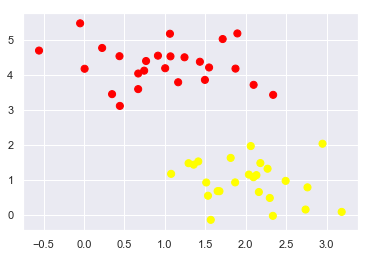

In [95]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

# 创造一批数据
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

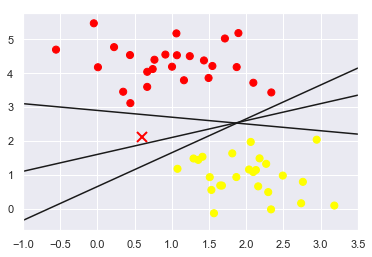

In [96]:
# 在两类之间划分界线
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

按照不同分解，同一个值X会在不同的类别。

In [97]:
# 使用SVC(Support vector classifier)

from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)    #采用线性分类
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

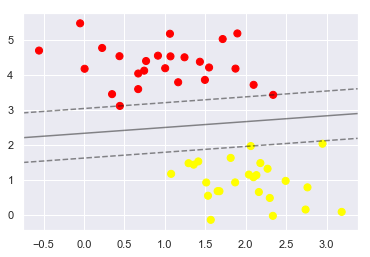

In [98]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [99]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

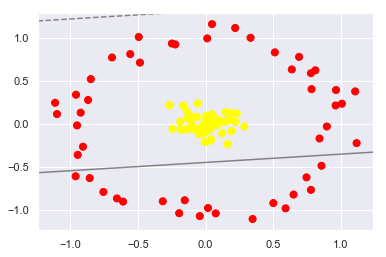

In [100]:
# 如果是下面分布状态的数据，上述方法失效
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

解决方法：升维，创建超平面

Text(0.5, 0, 'r')

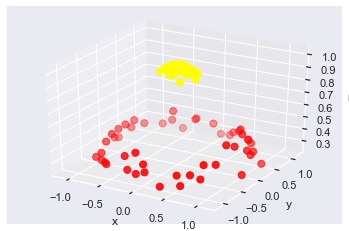

In [104]:
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 增加一个新的维度的数据
r = np.exp(-(X ** 2).sum(1))
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

In [105]:
#kernel='rbf', ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 
# C,惩罚参数
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

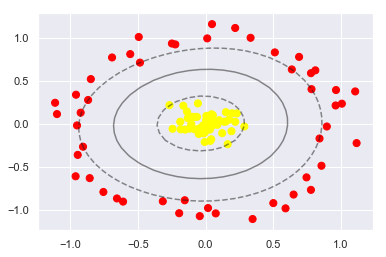

In [106]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

In [109]:
# svm案例：人脸识别
# 如果没有下载，需要一段时间下载，网络不友好，可能出问题
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012

Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009

Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006

Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015

/Users/qiwsir/scikit_learn_data/lfw_home/

解压缩

In [113]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

# 设置svc的几个参数，进行选择
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 1min 2s, sys: 8.62 s, total: 1min 11s
Wall time: 21.7 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [114]:
# 根据上述结果，选出最好的参数所支持的模型，并进行预测
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

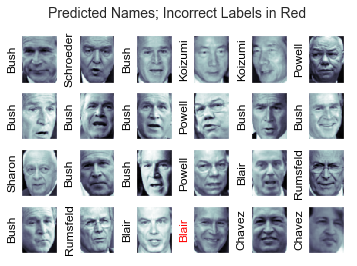

In [115]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [116]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

        micro avg       0.85      0.85      0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Text(89.18, 0.5, 'predicted label')

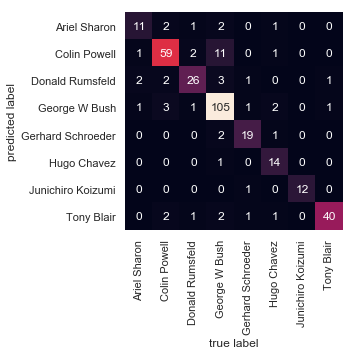

In [117]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# NLP和情感分析

案例：分析影评数据

In [80]:
# 读取数据
reviews_train = []
for line in open('/Users/qiwsir/Documents/Codes/DataSet/movie_data/full_train.txt', 'r'):
    reviews_train.append(line.strip())
    
reviews_test = []
for line in open('/Users/qiwsir/Documents/Codes/DataSet/movie_data/full_test.txt', 'r'):
    reviews_test.append(line.strip())

In [81]:
# 数据清理
# 原数据有换行符以及标点符号等，都去掉
import re

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(reviews_train)
reviews_test_clean = preprocess_reviews(reviews_test)

In [82]:
# 词向量
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
cv.fit(reviews_train_clean)
X = cv.transform(reviews_train_clean)
X_test = cv.transform(reviews_test_clean)

In [83]:
# 使用对数几率回归模型进行分类
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

target = [1 if i < 12500 else 0 for i in range(25000)]

X_train, X_val, y_train, y_val = train_test_split(X, target, train_size=0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    # 尝试不同的C值（惩罚），探测结果
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print("Accuracy for C={0}: {1}".format(c, accuracy_score(y_val, lr.predict(X_val))))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.87184
Accuracy for C=0.05: 0.88064
Accuracy for C=0.25: 0.8808
Accuracy for C=0.5: 0.87632
Accuracy for C=1: 0.87424


In [84]:
# c=0.05
final_model = LogisticRegression(C=0.05)
final_model.fit(X, target)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [85]:
#积极和消极评论的5个最具鉴别力的词
#分别通过查看最大系数和最小系数实现
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), final_model.coef_[0]
    )
}
#最正面的5个词
for best_positive in sorted(feature_to_coef.items(), 
                            key=lambda x: x[1], 
                            reverse=True)[:5]:
    print(best_positive)

('excellent', 0.929254921160503)
('perfect', 0.7907005851601673)
('great', 0.6745323520978707)
('amazing', 0.6127040031574729)
('superb', 0.6019368050082856)


In [86]:
# 最负面的5个词
for best_negative in sorted(feature_to_coef.items(),
                            key=lambda x: x[1])[:5]:
    print (best_negative)

('worst', -1.3645959291791647)
('waste', -1.1664242248094632)
('awful', -1.0324189696268895)
('poorly', -0.8752018850448516)
('boring', -0.8563543477261261)


In [87]:
# 对上述模型进行修改，先计算tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(reviews_train_clean)
X = tfidf_vectorizer.transform(reviews_train_clean)
X_test = tfidf_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, target, train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

Accuracy for C=0.01: 0.79968
Accuracy for C=0.05: 0.8344
Accuracy for C=0.25: 0.87312
Accuracy for C=0.5: 0.88496
Accuracy for C=1: 0.8928


In [13]:
# 移除停用词
# 使用nltk的语料库中的停用词
from nltk.corpus import stopwords 

english_stop_words = stopwords.words('english')

def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words

no_stop_words_train = remove_stop_words(reviews_train_clean)
no_stop_words_test = remove_stop_words(reviews_test_clean)

cv = CountVectorizer(binary=True)    #向量化
cv.fit(no_stop_words_train)
X = cv.transform(no_stop_words_train)
X_test = cv.transform(no_stop_words_test)

X_train, X_val, y_train, y_val = train_test_split(
    X, target, train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

Accuracy for C=0.01: 0.87376
Accuracy for C=0.05: 0.884
Accuracy for C=0.25: 0.88336
Accuracy for C=0.5: 0.8816
Accuracy for C=1: 0.87824


In [16]:
# 可以多角度尝试，然后比较，最终确定
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC    # 换一个算法，线性的支持向量机分类


stop_words = ['in', 'of', 'at', 'a', 'the']

# 增加向量化的参数
ngram_vectorizer = CountVectorizer(binary=True, 
                                   ngram_range=(1, 3), 
                                   stop_words=stop_words)
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, target, train_size = 0.75
)

# 用训练集集交叉验证
for c in [0.001, 0.005, 0.01, 0.05, 0.1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))

#用测试集
final = LinearSVC(C=0.01)
final.fit(X, target)
print ("Final Accuracy: %s" 
       % accuracy_score(target, final.predict(X_test)))

Accuracy for C=0.001: 0.88864
Accuracy for C=0.005: 0.88752
Accuracy for C=0.01: 0.89072
Accuracy for C=0.05: 0.89072
Accuracy for C=0.1: 0.88976
Final Accuracy: 0.90024


In [17]:
# 分别检出正面和负面词汇
feature_to_coef = {
    word: coef for word, coef in zip(
        ngram_vectorizer.get_feature_names(), final.coef_[0]
    )
}

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:30]:
    print (best_positive)
    
print("\n", "-"*10, "\n")
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:30]:
    print (best_negative)

('excellent', 0.22939110478307173)
('perfect', 0.18531833018490387)
('great', 0.17806934175181902)
('wonderful', 0.16012190752840882)
('amazing', 0.1503753733640884)
('superb', 0.14575660142640784)
('enjoyable', 0.14352839756212094)
('best', 0.1310355240624799)
('enjoyed', 0.12792307691141208)
('fun', 0.1262385429098172)
('brilliant', 0.1196898752371607)
('today', 0.11957024128302877)
('must see', 0.11731417535757654)
('fantastic', 0.11532908231657278)
('loved', 0.11253166711686557)
('liked', 0.11131477963564693)
('funniest', 0.11074688681744577)
('incredible', 0.10863518996290768)
('wonderfully', 0.1071109215240834)
('better than', 0.1066758753712973)
('beautiful', 0.10392001206022365)
('rare', 0.10375181628006473)
('love', 0.1011749877110733)
('bit', 0.10084913200837478)
('job', 0.10061781832324883)
('well worth', 0.10047592702996255)
('highly', 0.09982708128888033)
('watch it', 0.09899481036925697)
('10 10', 0.09722910040237952)
('recommended', 0.09703534518054399)

 ---------- 

('

### NLTK简介

NLTK（Natural language Toolkit）是由宾夕法尼亚大学计算机和信息科学使用python语言实现的一种自然语言工具包，其收集的大量公开数据集、模型上提供了全面、易用的接口，涵盖了分词、词性标注(Part-Of-Speech tag, POS-tag)、命名实体识别(Named Entity Recognition, NER)、句法分析(Syntactic Parse)等各项 NLP 领域的功能。

![nltk](./images/nltk.png)

In [88]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [89]:
# 比较下面的方式，和字符串的split()之间的差别
sentence = "The Quick brown fox, Jumps over the lazy little dog. Hello World."
word_tokenize(sentence)

['The',
 'Quick',
 'brown',
 'fox',
 ',',
 'Jumps',
 'over',
 'the',
 'lazy',
 'little',
 'dog',
 '.',
 'Hello',
 'World',
 '.']

In [90]:
syn = wordnet.synsets("computer")
print(syn)
print(syn[0].name())
print(syn[0].definition())
 
print(syn[1].name())
print(syn[1].definition())

[Synset('computer.n.01'), Synset('calculator.n.01')]
computer.n.01
a machine for performing calculations automatically
calculator.n.01
an expert at calculation (or at operating calculating machines)


In [21]:
# 自带停词库
stopwords.words('english')[:16]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself']

In [91]:
# 示例
para = "The program was open to all women between the ages of 17 and 35, in good health, who had graduated from an accredited high school. "
words = word_tokenize(para)
print(words)

['The', 'program', 'was', 'open', 'to', 'all', 'women', 'between', 'the', 'ages', 'of', '17', 'and', '35', ',', 'in', 'good', 'health', ',', 'who', 'had', 'graduated', 'from', 'an', 'accredited', 'high', 'school', '.']


In [92]:
useful_words = [word for word in words if word not in stopwords.words('english')]
print(useful_words)

['The', 'program', 'open', 'women', 'ages', '17', '35', ',', 'good', 'health', ',', 'graduated', 'accredited', 'high', 'school', '.']


In [94]:
# 读入nltk中的影评数据
from nltk.corpus import movie_reviews
movie_reviews.categories()

['neg', 'pos']

In [95]:
# 显示存储影评的文档
movie_reviews.fileids()[:4]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt']

In [96]:
# 对所有文档中的词汇进行统计
all_words = movie_reviews.words()  #得到所有词汇
freq_dist = nltk.FreqDist(all_words)    # 对单词计数
freq_dist.most_common(20)

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822),
 ('s', 18513),
 ('"', 17612),
 ('it', 16107),
 ('that', 15924),
 ('-', 15595),
 (')', 11781),
 ('(', 11664),
 ('as', 11378),
 ('with', 10792),
 ('for', 9961)]

In [97]:
movie_reviews.fileids('neg')[:4]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt']

In [98]:
def create_word_features(words):
    useful_words = [word for word in words if word not in stopwords.words("english")]
    my_dict = dict([(word, True) for word in useful_words])
    return my_dict

create_word_features(["the", "quick", "brown", "quick", "a", "fox"])

{'quick': True, 'brown': True, 'fox': True}

In [99]:
neg_reviews = []
for fileid in movie_reviews.fileids('neg'):    # 循环所有负向评论文档
    words = movie_reviews.words(fileid)
    neg_reviews.append((create_word_features(words), "negative"))
    
# 正向评论
pos_reviews = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.words(fileid)
    pos_reviews.append((create_word_features(words), "positive"))

In [31]:
train_set = neg_reviews[:750] + pos_reviews[:750]
test_set =  neg_reviews[750:] + pos_reviews[750:]
print(len(train_set),  len(test_set))

1500 500


In [32]:
# 利用自带的贝叶斯分类
classifier = NaiveBayesClassifier.train(train_set)
accuracy = nltk.classify.util.accuracy(classifier, test_set)
accuracy

0.724

In [33]:
# 重写对fetch_20newsgroups进行文本分类的程序
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import time

news = fetch_20newsgroups(subset='all')

#训练模型的函数
def train(classifier, X, y):
    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

    classifier.fit(X_train, y_train)
    end = time.time()

    print("Accuracy: " + str(classifier.score(X_test, y_test)) + ", Time duration: " + str(end - start))
    return classifier

# 创建模型实例
trial1 = Pipeline([('vectorizer', TfidfVectorizer()), 
                   ('classifier', MultinomialNB())])
# 训练
train(trial1, news.data, news.target)

Accuracy: 0.8538461538461538, Time duration: 4.096164226531982


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [34]:
# 引入stopwords
from nltk.corpus import stopwords

trial2 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),
                   ('classifier', MultinomialNB())])
train(trial2, news.data, news.target)

Accuracy: 0.8806366047745358, Time duration: 4.416067123413086


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [36]:
# 对多项式模型修改平滑系数alpha
for alpha in [5, 0.5, 0.05, 0.005, 0.0005]:
    trial3 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),
                       ('classifier', MultinomialNB(alpha=alpha))])
    train(trial3, news.data, news.target)

Accuracy: 0.8448275862068966, Time duration: 4.15918493270874
Accuracy: 0.8909814323607427, Time duration: 3.9641549587249756
Accuracy: 0.9122015915119364, Time duration: 4.026084899902344
Accuracy: 0.9175066312997348, Time duration: 4.224974632263184
Accuracy: 0.9169761273209549, Time duration: 3.993411064147949


In [37]:
# 继续优化，找出词根
import string
from nltk.stem import PorterStemmer    #词根（词干）
from nltk import word_tokenize

def stemming_tokenizer(text):
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in word_tokenize(text)]

trial5 = Pipeline([ ('vectorizer', TfidfVectorizer(tokenizer=stemming_tokenizer, 
                                                   stop_words=stopwords.words('english') 
                                                   + list(string.punctuation))), # 特殊符号
                   ('classifier', MultinomialNB(alpha=0.005))])

train(trial5, news.data, news.target)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  sorted(inconsistent))


Accuracy: 0.9228116710875331, Time duration: 122.02361702919006


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...ue, vocabulary=None)), ('classifier', MultinomialNB(alpha=0.005, class_prior=None, fit_prior=True))])

In [38]:
# 换一个分类器模型
from sklearn.svm import LinearSVC
trial6 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))), 
                   ('classifier', LinearSVC())])
train(trial6, news.data, news.target)

Accuracy: 0.9320954907161804, Time duration: 7.274240016937256


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

Accuracy: 0.9352785145888595, Time duration: 12.479760885238647


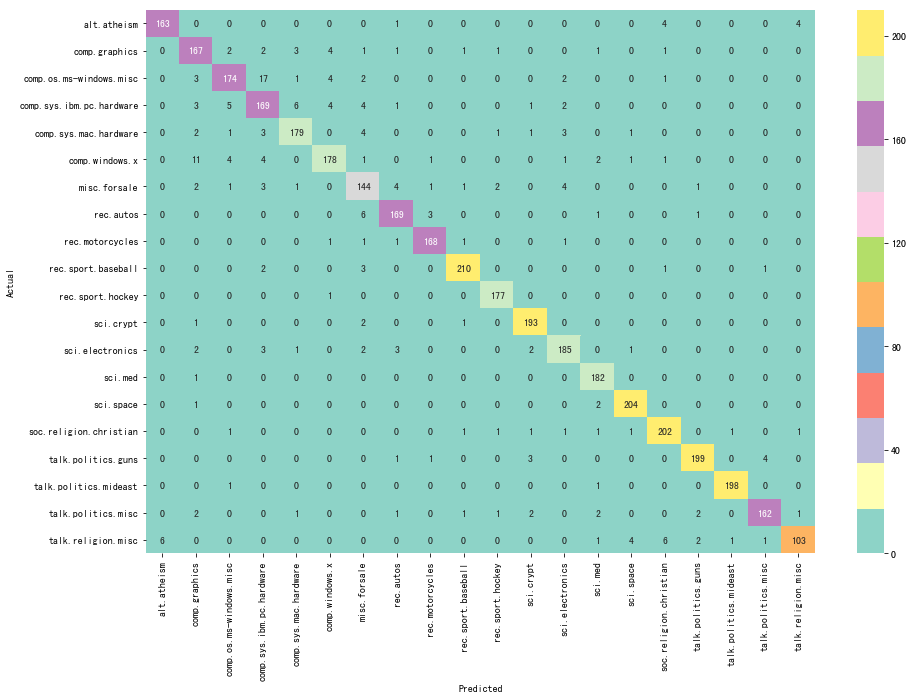

In [41]:
# 上述结果是目前最好的
# 评估
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

start = time.time()
classifier = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))),('classifier', LinearSVC(C=10))])
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.2, random_state=11)
classifier.fit(X_train, y_train)
end = time.time()

print("Accuracy: " + str(classifier.score(X_test, y_test)) + ", Time duration: " + str(end - start))

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion_matrix
fig, ax = plt.subplots(figsize=(15, 10))
labels = news.target_names
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d", xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [42]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=labels))

                          precision    recall  f1-score   support

             alt.atheism       0.96      0.95      0.96       172
           comp.graphics       0.86      0.91      0.88       184
 comp.os.ms-windows.misc       0.92      0.85      0.89       204
comp.sys.ibm.pc.hardware       0.83      0.87      0.85       195
   comp.sys.mac.hardware       0.93      0.92      0.93       195
          comp.windows.x       0.93      0.87      0.90       204
            misc.forsale       0.85      0.88      0.86       164
               rec.autos       0.93      0.94      0.93       180
         rec.motorcycles       0.97      0.97      0.97       173
      rec.sport.baseball       0.97      0.97      0.97       217
        rec.sport.hockey       0.97      0.99      0.98       178
               sci.crypt       0.95      0.98      0.96       197
         sci.electronics       0.93      0.93      0.93       199
                 sci.med       0.94      0.99      0.97       183
         

## 中文NLP

1. 分词
2. 语料库
3. 工具

参考：

1. 酒店评论的情感分析
2. 腾讯、百度、阿里等提供了API
    - https://ai.qq.com/
    - https://ai.baidu.com/
    - https://damo.alibaba.com/?lang=zh
3. 知乎的资料汇总：https://www.zhihu.com/question/20631050
4. github上的项目举例：
    - https://github.com/bung87/bixin
    - https://github.com/isnowfy/snownlp